# Assignment 3


In [10]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Task 1

In [11]:
A = sp.Matrix([[1, 0],
               [0, 1], 
               [1, 0]
    ])
A @ (A.T @ A).inv() @ A.T

Matrix([
[1/2, 0, 1/2],
[  0, 1,   0],
[1/2, 0, 1/2]])

In [12]:
B = sp.Matrix([[1, 2],
               [0, 1], 
               [1, 0]
    ])
B @ (B.T @ A).inv() @ B.T

Matrix([
[5/2, 2, -3/2],
[  1, 1,   -1],
[1/2, 0,  1/2]])

In [13]:
A = sp.Matrix([[1, 0],
               [0, 1], 
               [1, 0]
    ])
a1 = A[:, 0]
a2 = A[:, 1]
q1 = a1
q2 = a2 - (a1.dot(a2))/(a1.dot(a1)) * a1
Q = sp.Matrix([[q1.normalized(),q2.normalized()]])
R = Q.T @ A
Q

Matrix([
[sqrt(2)/2, 0],
[        0, 1],
[sqrt(2)/2, 0]])

In [14]:
R

Matrix([
[sqrt(2), 0],
[      0, 1]])

Task 3

In [15]:
A = sp.Matrix([[1/sp.sqrt(2), -1/sp.sqrt(2)],
               [1/2, 1/2], 
               [-1/2, -1/2]
    ])

B = sp.Matrix([1, 0, 1])

x = (A.T @ A).inv() @ A.T @ B #classic least squares

U, S, V = A.singular_value_decomposition()

x_svd =  V @ S.inv() @ U.T @ B
x_svd

Matrix([
[-0.5 + 0.5*sqrt(2)],
[-0.5*sqrt(2) - 0.5]])

In [16]:
B = sp.Matrix([1, -1])


Task 4

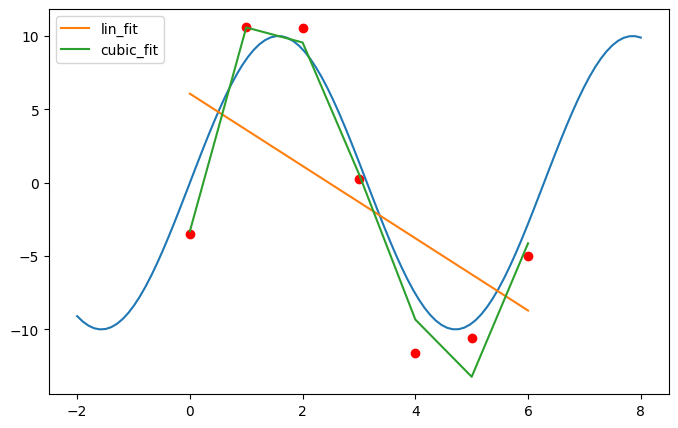

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(np.linspace(-2, 8, 100), 10*np.sin(np.linspace(-2, 8, 100)))
x = np.linspace(0,6,7)
f = np.array([10*np.sin(i) + np.random.normal(0, 2, 1) for i in x])
lin_fit = np.polyfit(x, f, 1)
plt.scatter(x,f, c='r')
plt.plot(x, lin_fit[0]*x + lin_fit[1], label='lin_fit')
cubic_fit = np.polyfit(x, f, 3)
plt.plot(x, cubic_fit[0]*x**3 + cubic_fit[1]*x**2 + cubic_fit[2]*x + cubic_fit[3], label='cubic_fit')
plt.legend()
plt.show()

Task 5

In [18]:
hdfName = 'image_data.hdf'
pd.HDFStore(hdfName).keys()
A = pd.read_hdf(hdfName, 'A', 'r+')
C = pd.read_hdf(hdfName, 'C', 'r+')

In [19]:
def mat2vec(A):
    return np.reshape(np.flipud(A), np.prod(A.shape))
def vec2mat(a, shape):
    return np.flipud(np.reshape(a, shape))

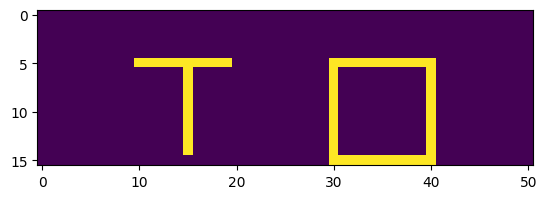

In [20]:
X = np.zeros((16,51))
X[5:15,15] = 1; X[5:15,30] = 1; X[5:15,40] = 1
X[5,10:20] = 1; X[5,30:41] = 1; X[15,30:41] = 1
plt.imshow(X);

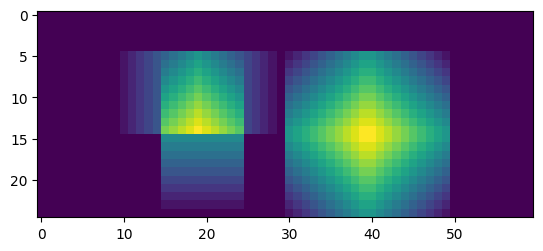

In [21]:
x = mat2vec(X)
plt.imshow(vec2mat(C @ x, (25, 60)));

Если \\(A\\) отфильтрованное изображение, а \\(A_{0}\\) и \\(C\\) - исходное изображение и и фильтр соответственно. 
Тогда нужно решить систему \\(A = CA_{0} + \epsilon\\). Система переопределена т.к. \\(n,m > n_{0},m_{0}\\)

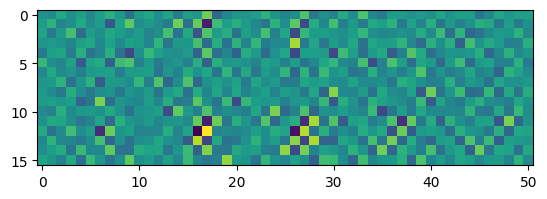

In [72]:
a = mat2vec(A)
a0 = np.linalg.pinv(C) @ a
A0 = vec2mat(a0, (16, 51))
plt.imshow(A0)

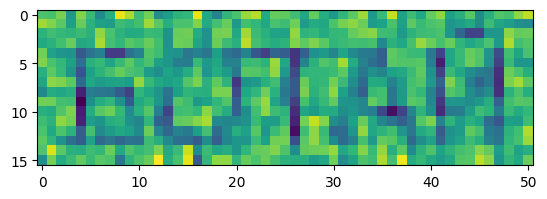

In [73]:
Uc, Sc, Vc = np.linalg.svd(C)
c_k = 350
C_p = Uc[..., :c_k] @ np.diag(Sc[:c_k]) @ Vc[:c_k, ...]
a0_p1 = np.linalg.pinv(C_p) @ a
A0_p1 = vec2mat(a0_p1, (16, 51))
plt.imshow(A0_p1)